In [8]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [9]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [10]:
X_test.shape

(10000, 32, 32, 3)

In [11]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [12]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [3]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [4]:
classes[9]

'truck'

In [ ]:
classes[4]


In [13]:
def plot_sample(X, y, index):
 plt.figure(figure = (15,2))
 plt.imshow(X[index])
 plt.xlabel(classes[y[index]])

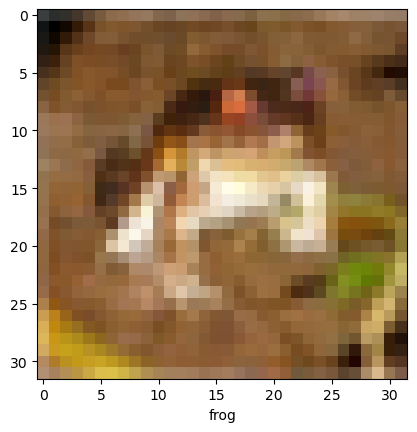

In [14]:
plot_sample(X_train, y_train, 0)

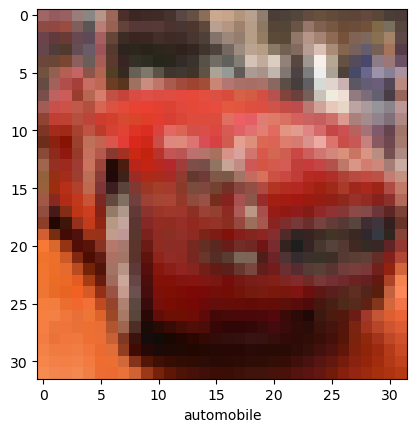

In [ ]:
plot_sample(X_train, y_train, 5)

normalizing


In [ ]:
X_train = X_train / 255
X_test = X_test / 255

build on ann

In [15]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'), 
    layers.Dense(1000, activation='relu'), 
    layers.Dense(10, activation='sigmoid')
  ])

ann.compile(optimizer = 'SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

c:\Users\palla\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.1010 - loss: nan
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.0983 - loss: nan
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.0993 - loss: nan
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.1002 - loss: nan
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.0995 - loss: nan


In [16]:
ann.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1001 - loss: nan


[nan, 0.10000000149011612]

In [17]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
classification Report: 
               precision    recall  f1-score   support

           0       0.10      1.00      0.18      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



c:\Users\palla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\palla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\palla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
cnn = models.Sequential([

      # cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

       #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),  
    layers.Dense(10, activation='softmax')
  ])


c:\Users\palla\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
cnn.compile(optimizer = 'adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])


In [20]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.2781 - loss: 3.9123
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4908 - loss: 1.4162
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5602 - loss: 1.2410
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6138 - loss: 1.0985
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6522 - loss: 0.9921
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6826 - loss: 0.9038
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7051 - loss: 0.8418
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7268 - loss: 0.7812
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7453 - loss: 0.7289
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7604 - loss: 0.6946


In [21]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6425 - loss: 1.1843


[1.1759769916534424, 0.641700029373169]

In [25]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

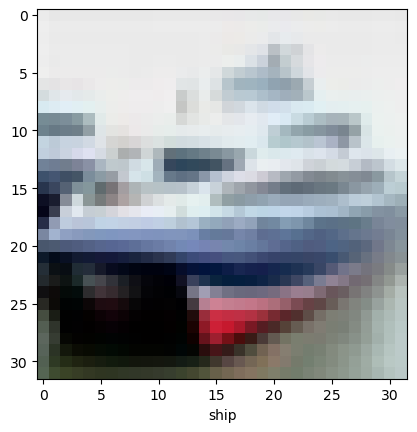

In [26]:
plot_sample(X_test, y_test, 1)

In [27]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[2.03290116e-03, 1.30791818e-06, 1.42677827e-03, 8.78977954e-01,
        1.00643584e-03, 8.75889733e-02, 2.76185311e-02, 6.13081153e-04,
        7.33417808e-04, 6.46931994e-07],
       [7.88425189e-03, 2.04778295e-02, 1.54425707e-05, 3.15079023e-06,
        4.20265224e-07, 4.70760483e-07, 1.58056662e-06, 1.71692562e-07,
        9.71535623e-01, 8.09374469e-05],
       [1.44167766e-01, 1.33562207e-01, 5.91556961e-03, 2.19757366e-03,
        1.48016366e-03, 5.02295967e-04, 1.16928783e-03, 6.08234783e-04,
        6.63773477e-01, 4.66233939e-02],
       [9.24484193e-01, 3.04836726e-06, 5.95309436e-02, 1.31110125e-03,
        1.02721620e-03, 1.36577191e-05, 9.85527222e-05, 1.17403169e-06,
        1.34810358e-02, 4.89508602e-05],
       [4.58400376e-04, 1.63221426e-04, 6.28053471e-02, 1.05814055e-01,
        1.38048351e-01, 1.28809530e-02, 6.79027498e-01, 6.30358816e-04,
        9.04688422e-05, 8.13401275e-05]], dtype=float32)

In [28]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [29]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

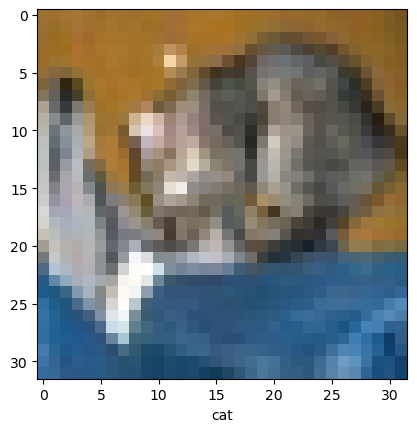

In [32]:
plot_sample(X_test, y_test, 0)

In [33]:
classes[y_classes[0]]

'cat'

In [34]:
print("classification_report: \n", classification_report(y_test, y_classes))

classification_report: 
               precision    recall  f1-score   support

           0       0.67      0.74      0.70      1000
           1       0.72      0.85      0.78      1000
           2       0.51      0.57      0.53      1000
           3       0.45      0.52      0.48      1000
           4       0.62      0.52      0.57      1000
           5       0.71      0.32      0.45      1000
           6       0.65      0.78      0.71      1000
           7       0.66      0.71      0.68      1000
           8       0.71      0.81      0.76      1000
           9       0.82      0.60      0.69      1000

    accuracy                           0.64     10000
   macro avg       0.65      0.64      0.64     10000
weighted avg       0.65      0.64      0.64     10000

